In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hr = pd.read_csv("/content/drive/MyDrive/Cases/human-resources-analytics/HR_comma_sep.csv")
dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']
print(X.shape)

(14999, 18)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    train_size=0.7,
                                                    random_state=2022)

In [5]:
mm = MinMaxScaler()
X_trn_scl = mm.fit_transform(X_train)
X_tst_scl = mm.transform(X_test)

#### Model Definition

#### Early Stopping

In [13]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation='relu',input_shape=(18,)), 
    tf.keras.layers.Dense(10, activation='relu'), 
    tf.keras.layers.Dense(5, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping( monitor='val_loss',min_delta=0.0001, patience=10,verbose=3,restore_best_weights=True)
history = model.fit(X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=1000,
                    callbacks=[early])

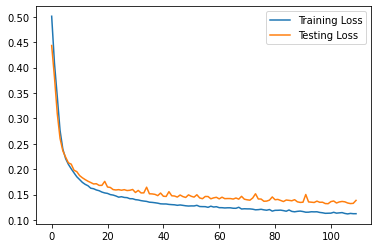

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='best')
plt.show()